In [1]:
import pandas as pd
import numpy as np

subpath = "agg_function_periodic_experiment_y_original/2025-01-06T17:07:48"
data = pd.read_csv(f'{subpath}/minimal_with_univariate.csv')


In [2]:
data.drop(columns=['Unnamed: 7'], inplace=True)

In [3]:
group = data.groupby(["período", "função"])['nmae'].agg(['mean', 'std']).reset_index()

In [4]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [5]:
group

,período,função,mean,std
0,2,máximo,11.0,1.0
1,2,média,11.0,1.0
2,2,mínimo,11.0,2.0
3,4,máximo,12.0,2.0
4,4,média,12.0,2.0
5,4,mínimo,11.0,2.0
6,8,máximo,12.0,2.0
7,8,média,12.0,2.0
8,8,mínimo,12.0,2.0
9,16,máximo,12.0,1.0


In [6]:
new_data = pd.DataFrame({'período': [1,1,1], 'função': ["média", "máximo", "mínimo"], 'mean': [11,11,11], 'std': [2,2,2]},
                        )

total_table = pd.concat([group, new_data], ignore_index=True)


In [7]:
total_table.set_index('período', inplace=True)

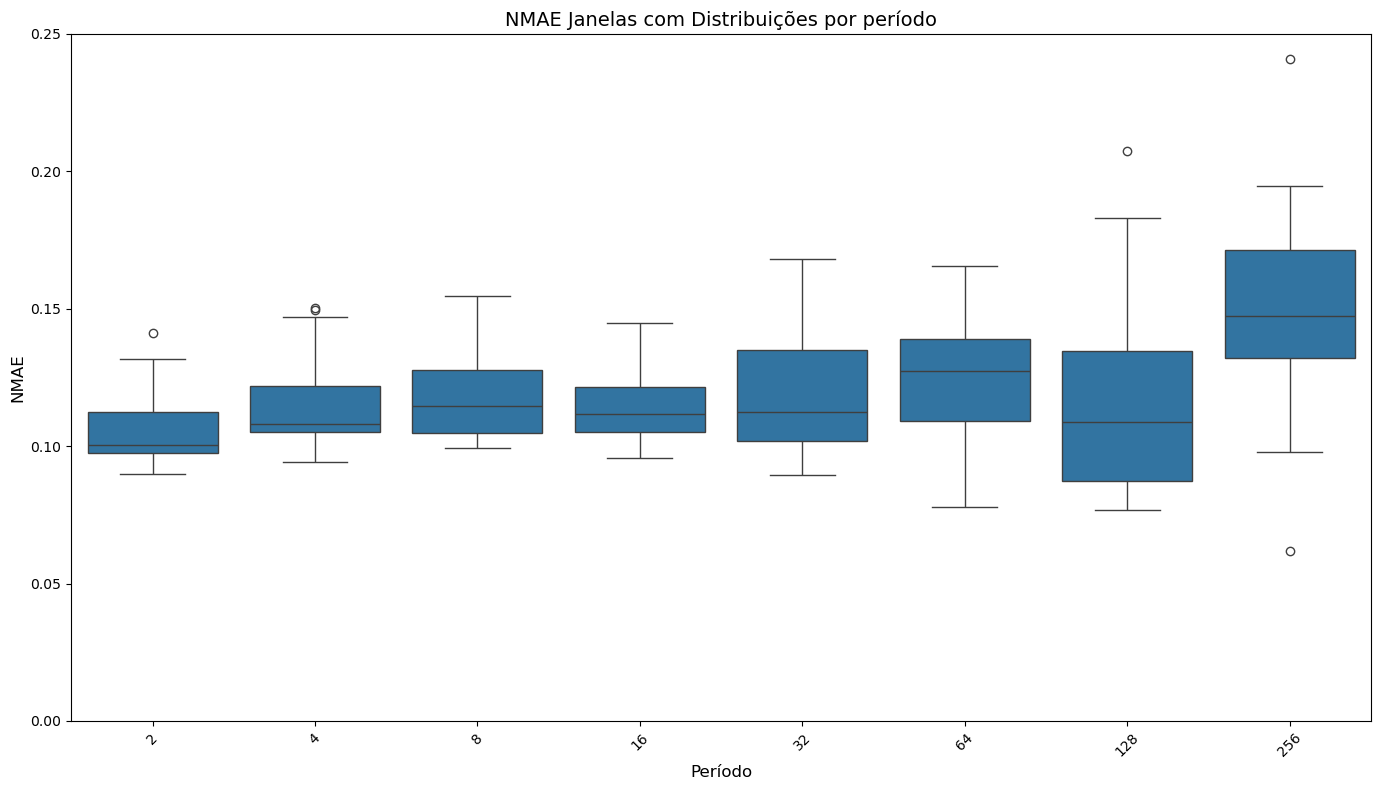

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y_limits = (0, 0.25)
plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data)

plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
plt.title("NMAE Janelas com Distribuições por período", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(y_limits)
plt.show()

In [9]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [10]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [11]:
group_by_method

,período,método,mean,std
0,2,RF,10.0,1.0
1,2,RT,11.0,2.0
2,4,RF,11.0,2.0
3,4,RT,12.0,2.0
4,8,RF,11.0,2.0
5,8,RT,12.0,2.0
6,16,RF,11.0,2.0
7,16,RT,12.0,1.0
8,32,RF,12.0,3.0
9,32,RT,12.0,3.0


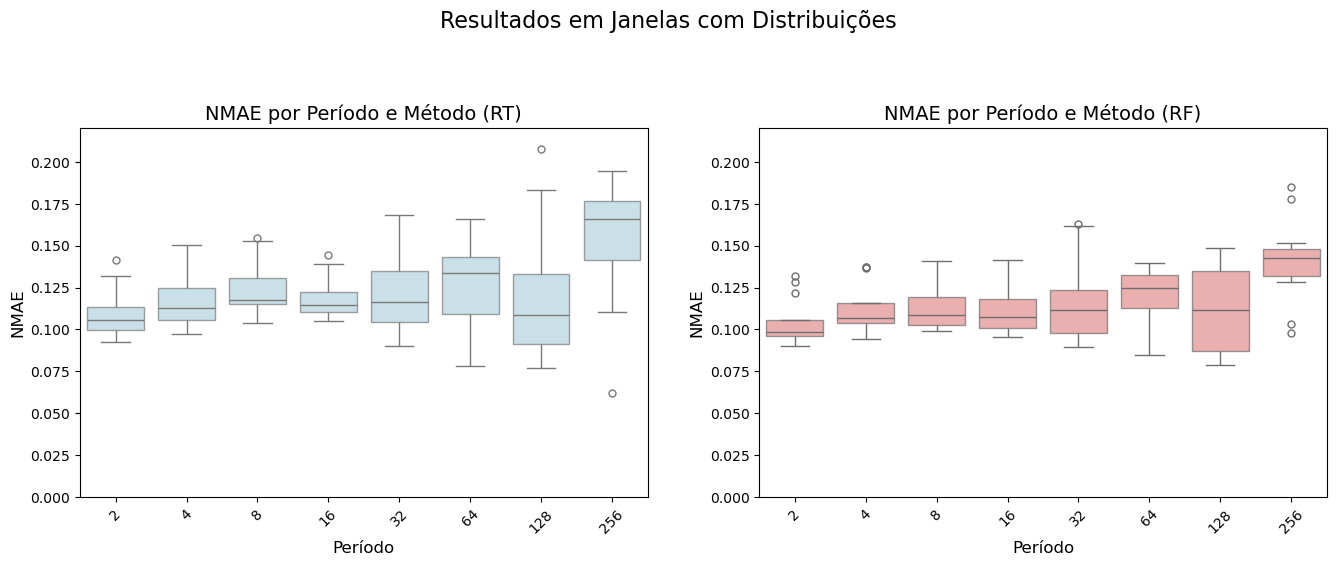

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.22)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()
